In [3]:
import pandas as pd
import nltk

In [4]:
isot_dataset = pd.read_csv("./ISOT/combined.csv", sep=";")

In [5]:
isot_dataset.head()

,subject,title,text,date,TF
0,politics,U.S. Senate confirms Trump's pick for top Supr...,WASHINGTON (Reuters) - The Republican-controll...,"September 21, 2017",True
1,worldnews,Catalonia government says 893 injured in clash...,MADRID (Reuters) - The Catalan health service ...,"October 2, 2017",True
2,politics,COLLEGE HOLDS EARLY SEGREGATED ORIENTATION To ...,THIS IS EXPECTED FROM THIS LEFTY COLLEGE Will ...,"Aug 16, 2017",False
3,politics,LIBERAL LUNATIC CHRIS MATTHEWS Scolded By Pier...,Who knew former CNN anchor Piers Morgan would ...,"Apr 13, 2017",False
4,worldnews,Sarah Palin Just Sent A Truly Idiotic Message ...,Now that Ted Cruz has dropped out of the presi...,"May 4, 2016",False


In [6]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anirudhsriram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anirudhsriram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
isot_dataset['title_tokenized'] = isot_dataset.apply(lambda row: nltk.word_tokenize(row['title']), axis = 1)
isot_dataset = isot_dataset.loc[~ isot_dataset['text'].isnull()]
isot_dataset['text_tokenized'] = isot_dataset.apply(lambda row: nltk.word_tokenize(row['text']), axis = 1)

In [8]:
isot_dataset['text_tokenized'] = isot_dataset.apply(lambda row: [word.lower() for word in row['text_tokenized']], axis = 1)
isot_dataset['title_tokenized'] = isot_dataset.apply(lambda row: [word.lower() for word in row['title_tokenized']], axis = 1)

In [9]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
isot_dataset['text_tokenized'] = isot_dataset.apply(lambda row: [lemmatizer.lemmatize(word) for word in row['text_tokenized']], axis = 1)
isot_dataset['title_tokenized'] = isot_dataset.apply(lambda row: [lemmatizer.lemmatize(word) for word in row['title_tokenized']], axis = 1)

In [10]:
isot_dataset['text_tokenized'].head()
isot_dataset['title_tokenized'].head()

0    [u.s., senate, confirms, trump, 's, pick, for,...
1    [catalonia, government, say, 893, injured, in,...
2    [college, hold, early, segregated, orientation...
3    [liberal, lunatic, chris, matthew, scolded, by...
4    [sarah, palin, just, sent, a, truly, idiotic, ...
Name: title_tokenized, dtype: object

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword_set = stopwords.words('english')
punctuations = [':', ';', ',', '(', ')', '\'', '"', '-', '“','”', '’', '.']
for symbol in punctuations:
    stopword_set.append(symbol)
isot_dataset['text_stop_words_removed'] = isot_dataset.apply(lambda row: [word for word in row['text_tokenized'] if not word in stopword_set], axis = 1)
isot_dataset['title_stop_words_removed'] = isot_dataset.apply(lambda row: [word for word in row['title_tokenized'] if not word in stopword_set], axis = 1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anirudhsriram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
isot_dataset.head()

,subject,title,text,date,TF,title_tokenized,text_tokenized,text_stop_words_removed,title_stop_words_removed
0,politics,U.S. Senate confirms Trump's pick for top Supr...,WASHINGTON (Reuters) - The Republican-controll...,"September 21, 2017",True,"[u.s., senate, confirms, trump, 's, pick, for,...","[washington, (, reuters, ), -, the, republican...","[washington, reuters, republican-controlled, u...","[u.s., senate, confirms, trump, 's, pick, top,..."
1,worldnews,Catalonia government says 893 injured in clash...,MADRID (Reuters) - The Catalan health service ...,"October 2, 2017",True,"[catalonia, government, say, 893, injured, in,...","[madrid, (, reuters, ), -, the, catalan, healt...","[madrid, reuters, catalan, health, service, sa...","[catalonia, government, say, 893, injured, cla..."
2,politics,COLLEGE HOLDS EARLY SEGREGATED ORIENTATION To ...,THIS IS EXPECTED FROM THIS LEFTY COLLEGE Will ...,"Aug 16, 2017",False,"[college, hold, early, segregated, orientation...","[this, is, expected, from, this, lefty, colleg...","[expected, lefty, college, trickle, college, ?...","[college, hold, early, segregated, orientation..."
3,politics,LIBERAL LUNATIC CHRIS MATTHEWS Scolded By Pier...,Who knew former CNN anchor Piers Morgan would ...,"Apr 13, 2017",False,"[liberal, lunatic, chris, matthew, scolded, by...","[who, knew, former, cnn, anchor, pier, morgan,...","[knew, former, cnn, anchor, pier, morgan, woul...","[liberal, lunatic, chris, matthew, scolded, pi..."
4,worldnews,Sarah Palin Just Sent A Truly Idiotic Message ...,Now that Ted Cruz has dropped out of the presi...,"May 4, 2016",False,"[sarah, palin, just, sent, a, truly, idiotic, ...","[now, that, ted, cruz, ha, dropped, out, of, t...","[ted, cruz, ha, dropped, presidential, race, d...","[sarah, palin, sent, truly, idiotic, message, ..."


In [13]:
isot_dataset['text_recombined'] = isot_dataset.apply(lambda row: ' '.join(row['text_stop_words_removed']), axis = 1)
isot_dataset['title_recombined'] = isot_dataset.apply(lambda row: ' '.join(row['title_stop_words_removed']), axis = 1)
isot_dataset['title_text'] = isot_dataset.apply(lambda row: row['text_recombined'] + ' ' + row['title_recombined'], axis = 1)

In [15]:
isot_dataset.to_csv('./ISOT/combined_tokenized_stopword_removed.csv')

In [16]:
isot_dataset['title_text'].head()

0    washington reuters republican-controlled u.s. ...
1    madrid reuters catalan health service said 893...
2    expected lefty college trickle college ? parti...
3    knew former cnn anchor pier morgan would criti...
4    ted cruz ha dropped presidential race donald t...
Name: title_text, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(ngram_range = (1, 3))

In [18]:
x = v.fit_transform(isot_dataset['title_recombined'])

In [19]:
x_tfidf = pd.DataFrame(x.toarray(), columns=v.get_feature_names())

/Users/anirudhsriram/A/ms/analytics/fake-news-detector/datasets/dataset-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
isot_dataset.replace({False: 0, True: 1}, inplace=True)
y = isot_dataset['TF']

In [21]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: TF, dtype: int64

In [85]:
# Run this if you want to add each TF IDF value to the original dataset instead of keeping it separate
# isot_dataset = pd.concat([isot_dataset, x_tfidf], axis = 1)

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

In [23]:
# MultinomialNB Algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
import matplotlib.pyplot as plt

classifier=MultinomialNB()

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.949
Confusion matrix, without normalization


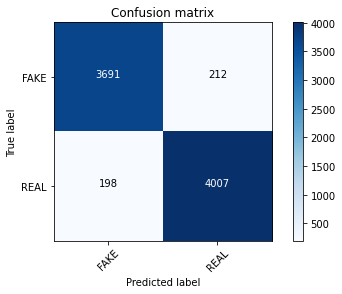

In [98]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [25]:
from sklearn import svm

In [26]:
clf = svm.SVC(kernel='linear')

accuracy:   0.955
Confusion matrix, without normalization


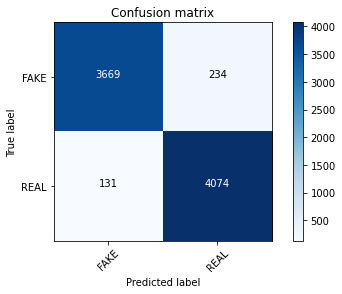

In [27]:
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

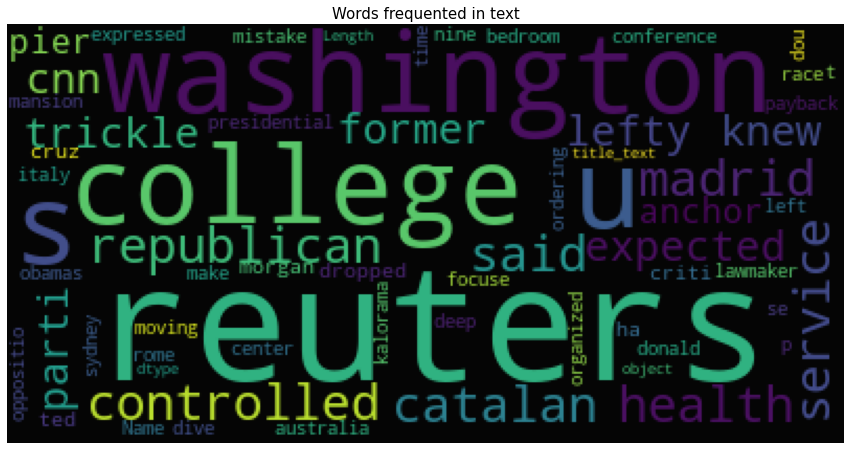

In [29]:
from wordcloud import WordCloud

wordcloud = WordCloud(
                        background_color='black',
                        max_words=200, 
                        random_state=42).generate(str(isot_dataset['title_text']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()